# MarkovChain group presentation


In [19]:
# Imports
%matplotlib inline

import sys
sys.path.append('..')

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import markov.modules.clustering as cluster
import markov.modules.estimate_transitionmatrix as estimator
import markov.modules.analysis as analysis
import markov.modules.visualization as visual

In [33]:
# Parameters
filename = "../example_1.dat"
num_cluster = 4 # Number of clusters
lag=1
slide=False
kmeans_method = 1 

In [8]:
# read data
rawData = np.loadtxt(filename, ndmin=2)

In [10]:
print rawData[:5]

[[ 0.        ]
 [ 2.54764091]
 [ 2.28948128]
 [ 0.8843802 ]
 [-0.08986103]]


In [34]:
# clusterig
pt_to_cc, cc = cluster.kmeans(rawData, num_cluster, kmeans_method)

In [35]:
# estimate transition matrix

# set up count matrix
countMat = estimator.count_transitions(pt_to_cc, lag, slide)

# create transition matrix with detailed balance condition
transMat = estimator.db_estimator(countMat)

In [36]:
# analysis

#create MSM object
anaMat = analysis.MSM(transMat)

print "stationary distribution: \n" + str(anaMat.statDist())
print "eigenvalues: \n" + str(anaMat.eigenvalues())

stationary distribution: 
[ 0.24151497  0.27717581  0.21655434  0.26475489]
eigenvalues: 
[  1.00000000e+00   2.37303311e-01   1.68896481e-02  -3.04018380e-04]


In [48]:
ccc = np.sort([x[0] for x in cc])

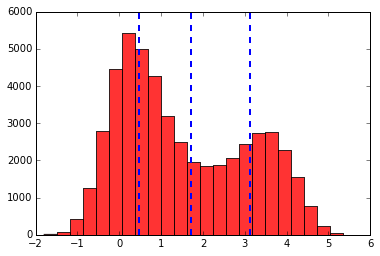

In [49]:
# for 1D with 2 clusters
plt.hist(rawData, bins=25, color="r", alpha=0.8)
for i in range(0,len(cc)-1):
    plt.axvline((ccc[i+1]+ccc[i])/2, color='b', linestyle='dashed', linewidth=2)
plt.show()

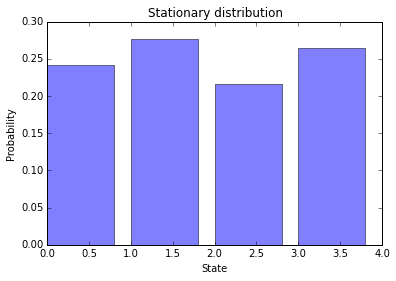

In [50]:
visual.plot_stationary(anaMat.statDist())

In [51]:
print anaMat.hitting_prob([0], [1])

[ 1.          0.          0.50585846  0.39920969]
